In [72]:
!pip install pytrends matplotlib pandas seaborn plotly

Defaulting to user installation because normal site-packages is not writeable


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import plotly.express as px

  ## Setup pytrend library and keyword define

In [74]:
pytrends = TrendReq(hl="en-US", tz=360)
keyword = "Data Analyst"

## Data Request

In [75]:
pytrends.build_payload([keyword], cat=0, timeframe="today 12-m", geo = "", gprop="")

## Country by interst

In [76]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword , ascending = False).head(15) 

In [77]:
print(region_data)

                      Data Analyst
geoName                           
India                          100
Nigeria                         93
Kenya                           82
Singapore                       73
South Africa                    65
United Kingdom                  59
United Arab Emirates            56
Ghana                           55
Sri Lanka                       54
Canada                          51
Ireland                         49
United States                   48
Tunisia                         43
Pakistan                        42
Nepal                           40


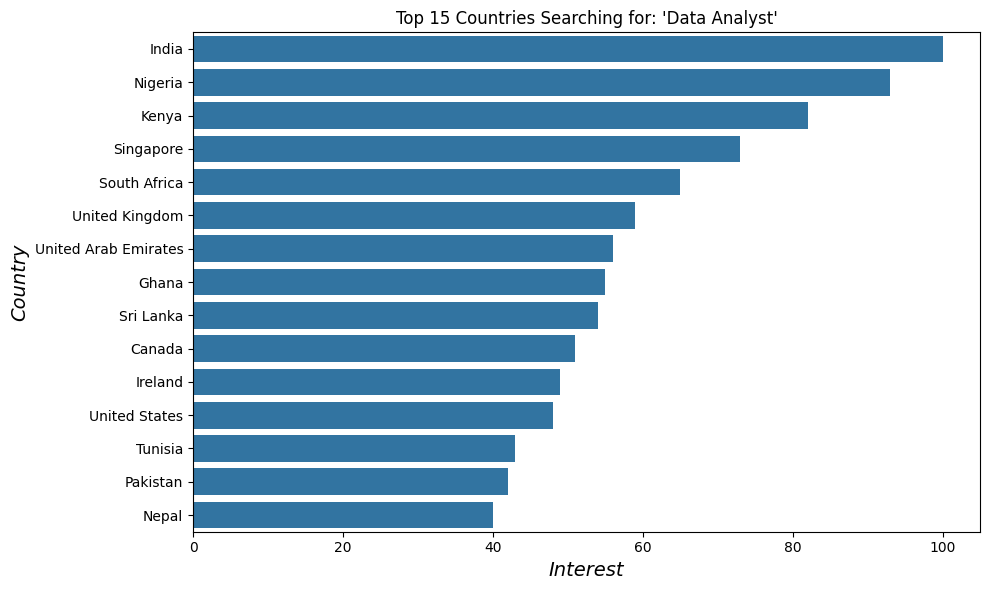

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_data[keyword], y=region_data.index)
plt.title(f"Top 15 Countries Searching for: '{keyword}'")
plt.xlabel("Interest", color='Black', fontsize=14, style = "italic")
plt.ylabel("Country", color='black', fontsize=14, style = "italic")
plt.tight_layout()
plt.show()


## Word Map Plot

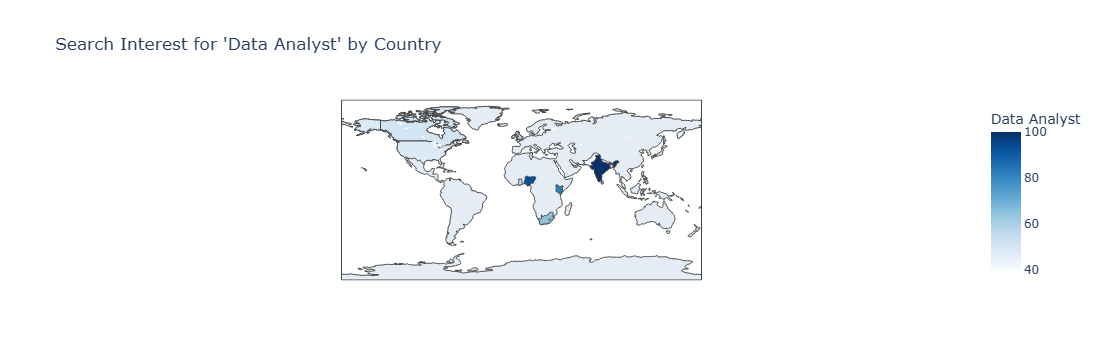

In [81]:
region_data = region_data.reset_index()
fig = px.choropleth(
    region_data,
    locations="geoName",
    locationmode ="country names", 
    color=keyword, 
    title=f"Search Interest for '{keyword}' by Country",
    color_continuous_scale="Blues"
)

fig.show()

## Time Wise Interest

In [82]:
time_df = pytrends.interest_over_time()

C:\Users\shash\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



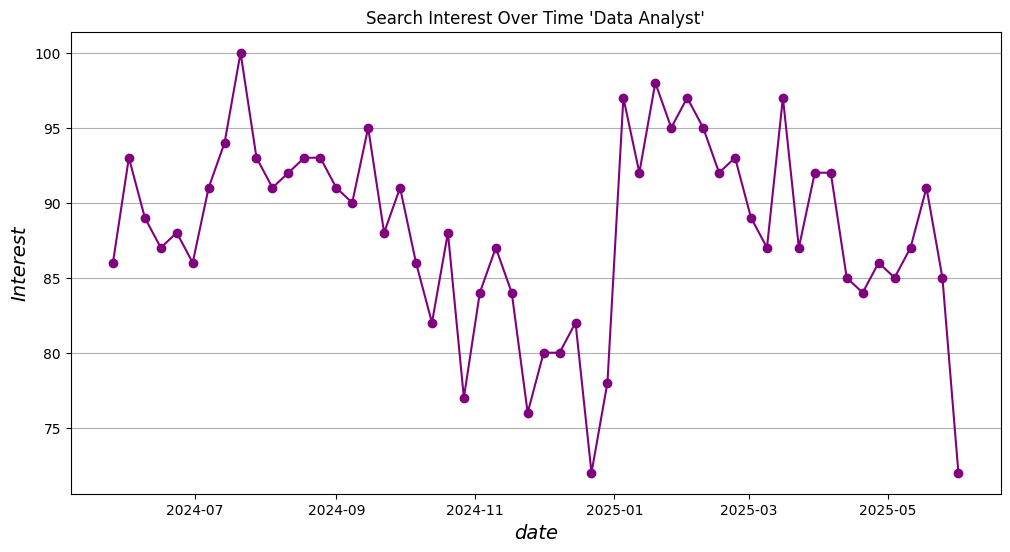

In [83]:
plt.figure(figsize = (12,6))
plt.plot(time_df.index , time_df[keyword], marker = "o", color = "purple")
plt.title(f"Search Interest Over Time '{keyword}'")
plt.xlabel("date", fontsize=14, style = "italic")
plt.ylabel("Interest", fontsize=14, style = "italic")
plt.grid(axis = "y")
plt.show()

## Multiple Keywords Compare 

In [84]:
kw_list = ["Data Science" , "Data Engineering", "Ai Engineering"]
pytrends.build_payload(kw_list, cat = 0 , timeframe = "today 12-m", geo = "", gprop = "")

C:\Users\shash\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



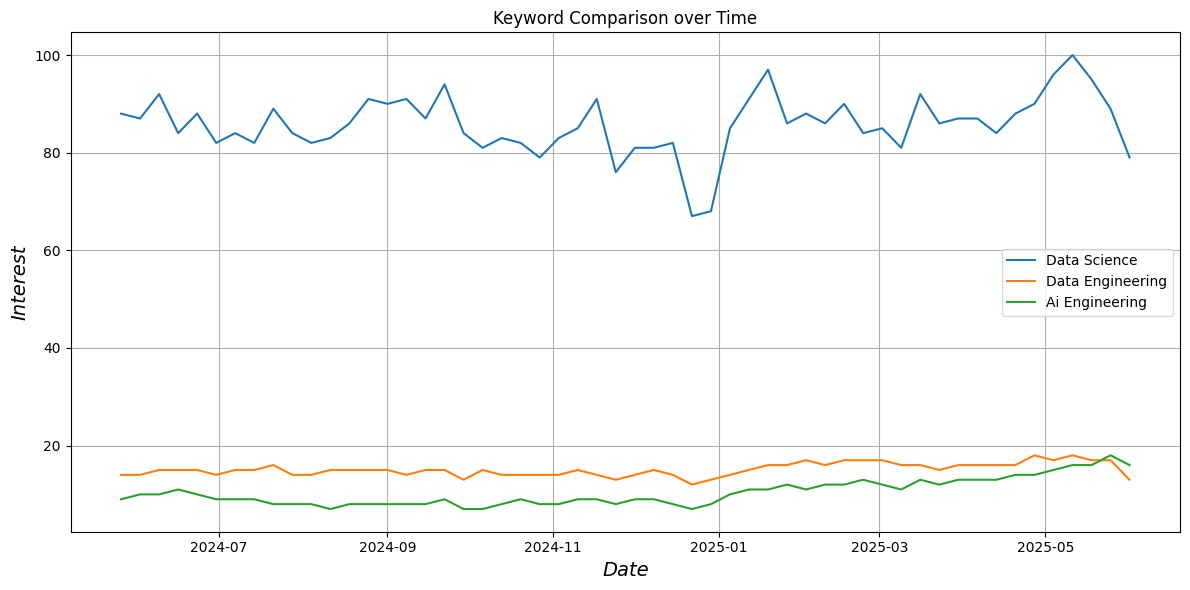

In [85]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize = (12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw] , label = kw)
plt.title("Keyword Comparison over Time")
plt.xlabel("Date", fontsize=14, style = "italic")
plt.ylabel("Interest", fontsize=14, style = "italic")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()